In [ ]:
%pwd

'/content'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
os.chdir("/content/new_folder")

In [ ]:
mkdir new_folder


In [ ]:
df1=pd.read_csv("221.csv")
print(df1.head(10))
print(f"Shape : {df1.shape}")

   RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    28    81   120    98  74     73        0
1    29    81   120    98  74     73        0
2    30    81   120    98  74     73        0
3    30    81   120    99  74     73        0
4    29    81   120    99  73     73        0
5    30    81   120    98  73     73        0
6    30    81   120    98  73     73        0
7    30    81   120    98  73     73        0
8    26    81   120    98  74     74        0
9    26    81   120    98  74     74        0
Shape : (24999, 7)


In [ ]:
df2=pd.read_csv("230.csv")
df2.head(10)

RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    15    54    73    97  72     71        0
1    15    54    73    97  72     71        0
2    15    54    73    97  72     71        0
3    15    54    73    97  72     71        0
4    15    55    74    97  72     71        0
5    15    55    74    97  72     71        0
6    14    54    73    97  72     71        0
7    14    54    73    97  72     71        0
8    14    54    73    97  72     71        0
9    14    54    73    97  72     71        0

In [ ]:
#Checking for null values
print(df1.isnull().sum())
print('*'*50)
print(df2.isnull().sum())

RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64
**************************************************
RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64


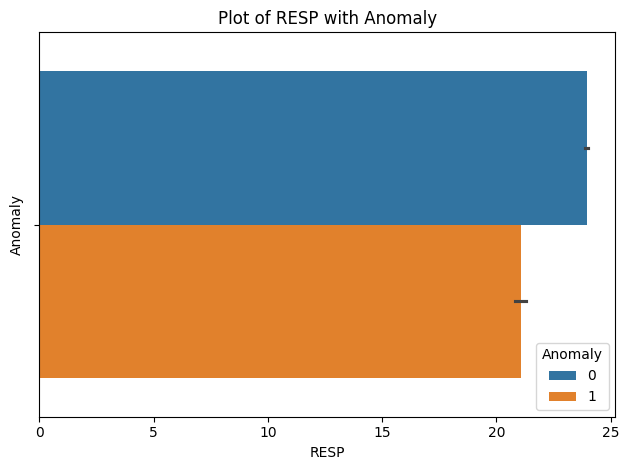

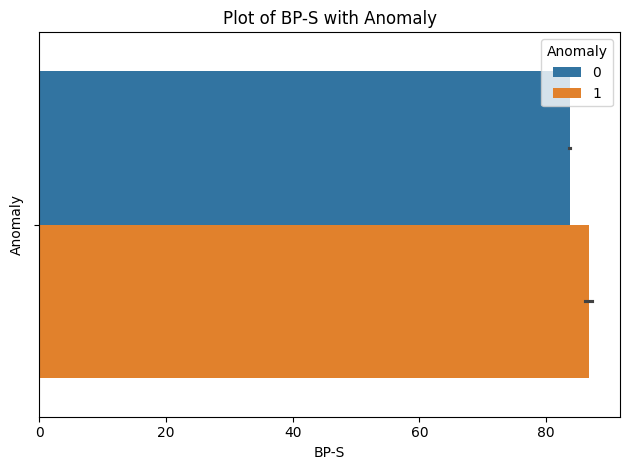

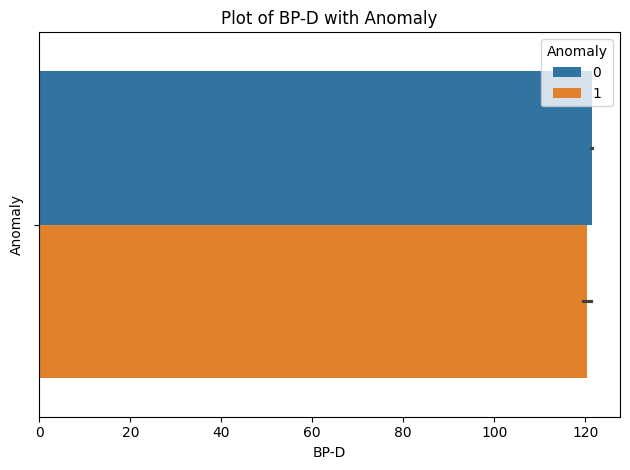

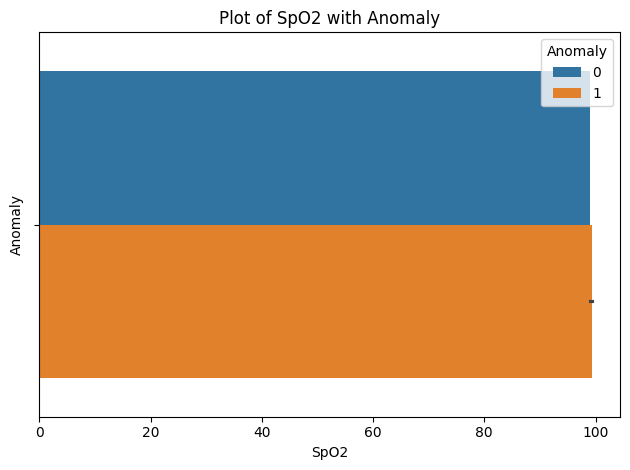

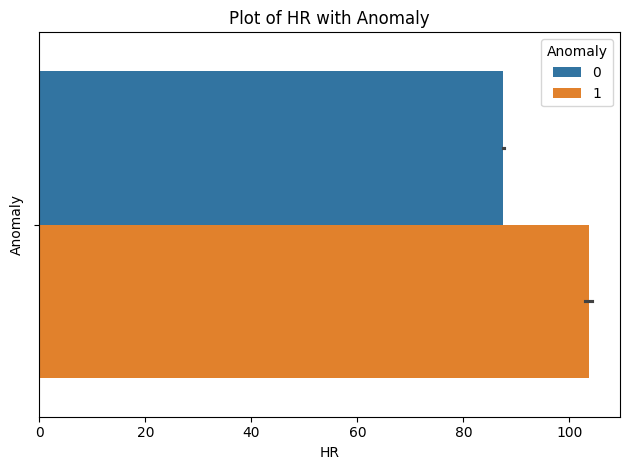

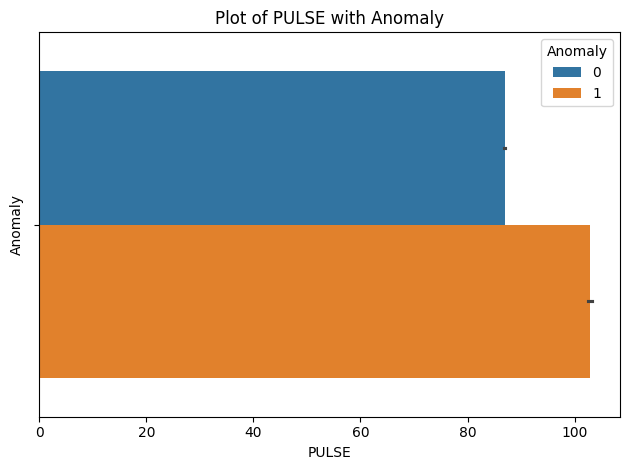

In [ ]:
#Checking the variation of the parameter anomaly with others
features=['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']
for feature in features:
    #checking the variation of the features with anomaly
    sns.barplot(x=feature,data=df1,hue='Anomaly',dodge=True)
    plt.xlabel(f"{feature}")
    plt.ylabel(f"Anomaly")
    plt.title(f"Plot of {feature} with Anomaly")
    plt.tight_layout()
    plt.show()

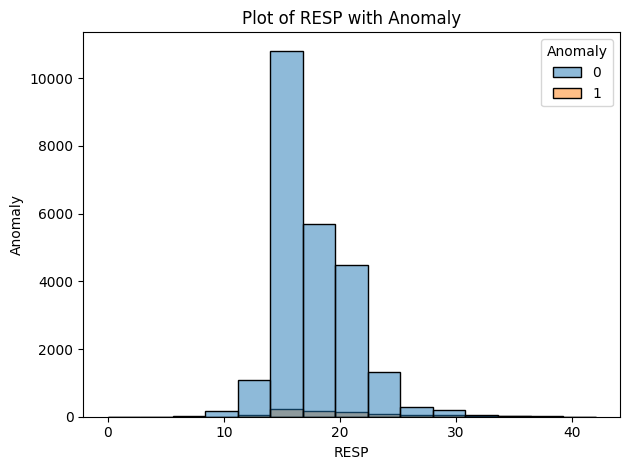

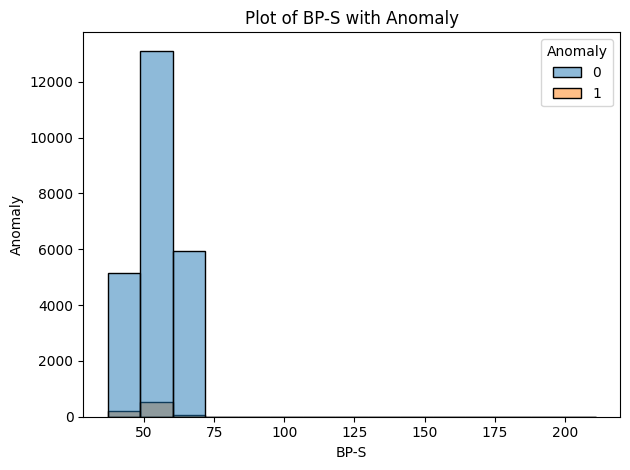

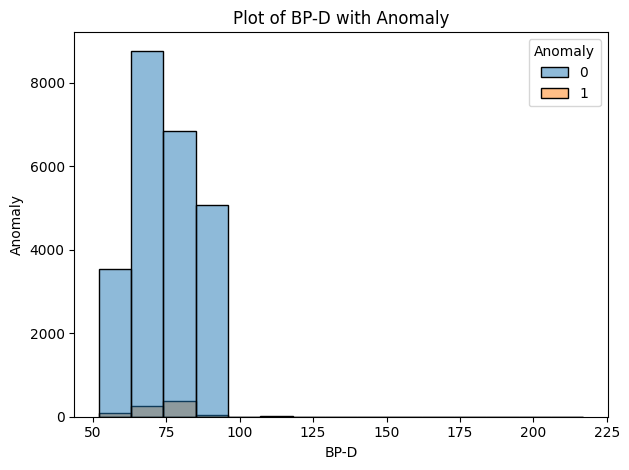

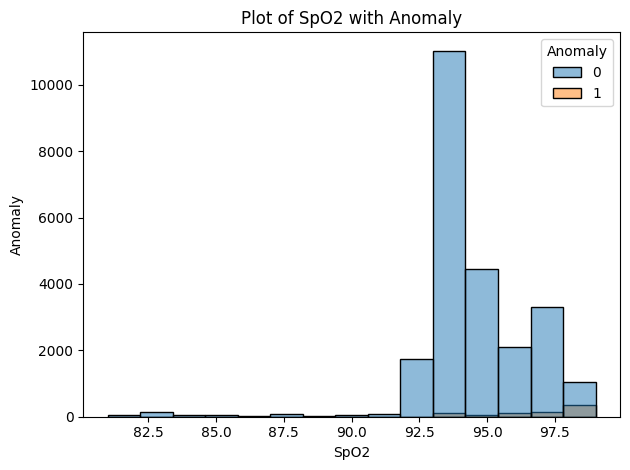

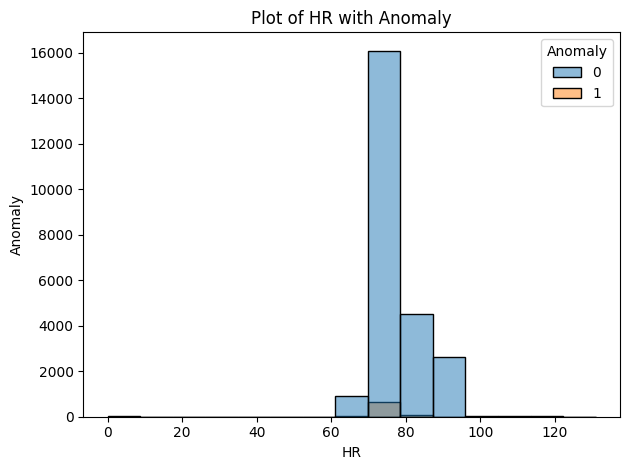

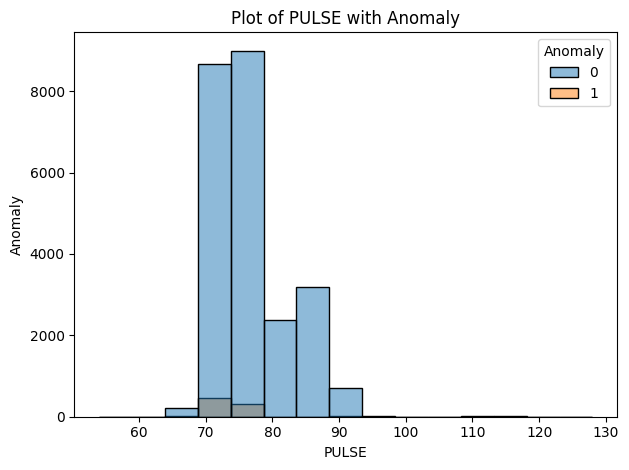

In [ ]:
#Checking the variation of the parameter anomaly with others
features=['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']
for feature in features:
    #checking the variation of the features with anomaly
    sns.histplot(x=feature,data=df2,hue='Anomaly',bins=15)
    plt.xlabel(f"{feature}")
    plt.ylabel(f"Anomaly")
    plt.title(f"Plot of {feature} with Anomaly")
    plt.tight_layout()
    plt.show()

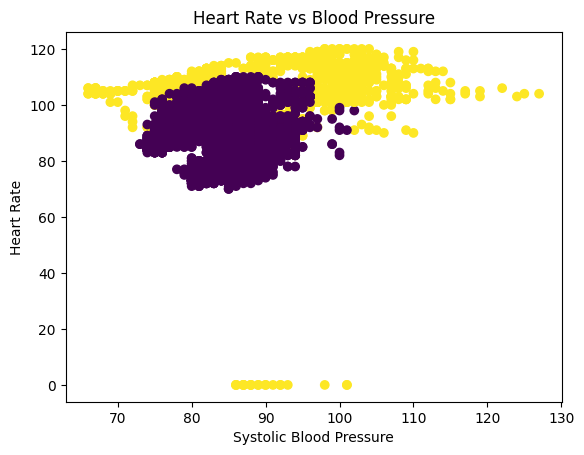

In [ ]:
#Heart rate vs blood pressure
plt.scatter(x=df1['BP-S'],y=df1['HR'],c=df1['Anomaly'])
plt.xlabel("Systolic Blood Pressure")
plt.ylabel("Heart Rate")
plt.title("Heart Rate vs Blood Pressure")
plt.show()

In [ ]:
#To check presence of outliers
Q1 = df1[['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']].quantile(0.25)
Q3 = df1[['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']].quantile(0.75)
IQR = Q3 - Q1

# Removing extreme outliers (if necessary)
data_no_outliers = df1[~((df1[['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']] < (Q1 - 1.5 * IQR)) |
                          (df1[['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']] > (Q3 + 1.5 * IQR))).any(axis=1)]

df1=data_no_outliers



In [ ]:
Q1 = df2[['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']].quantile(0.25)
Q3 = df2[['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']].quantile(0.75)
IQR = Q3 - Q1

# Removing extreme outliers (if necessary)
data_no_outliers = df2[~((df2[['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']] < (Q1 - 1.5 * IQR)) |
                          (df2[['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']] > (Q3 + 1.5 * IQR))).any(axis=1)]

df2=data_no_outliers


Although Decision Trees and Random Forests are generally robust towards outliers
removing extreme ones may help improve model interpretability and reduce noise.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
features = ['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']

scaler = MinMaxScaler()

# Fit the scaler on the numerical features of df1
scaler.fit(df1[features])

# Transform the numerical features using the fitted scaler
df1[features] = scaler.transform(df1[features])


In [ ]:
print(df1.head())

       RESP   BP-S      BP-D  SpO2        HR  PULSE  Anomaly
0  0.736842  0.375  0.520833  0.50  0.086957   0.14        0
1  0.789474  0.375  0.520833  0.50  0.086957   0.14        0
2  0.842105  0.375  0.520833  0.50  0.086957   0.14        0
3  0.842105  0.375  0.520833  0.75  0.086957   0.14        0
4  0.789474  0.375  0.520833  0.75  0.065217   0.14        0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
features = ['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']

scaler = MinMaxScaler()

# Fit the scaler on the numerical features of df2
scaler.fit(df2[features])

# Transform the numerical features using the fitted scaler
df2[features] = scaler.transform(df2[features])


In [ ]:
print(df2.head())

       RESP      BP-S      BP-D  SpO2        HR  PULSE  Anomaly
0  0.368421  0.447368  0.428571   0.8  0.238095   0.28        0
1  0.368421  0.447368  0.428571   0.8  0.238095   0.28        0
2  0.368421  0.447368  0.428571   0.8  0.238095   0.28        0
3  0.368421  0.447368  0.428571   0.8  0.238095   0.28        0
4  0.368421  0.473684  0.448980   0.8  0.238095   0.28        0


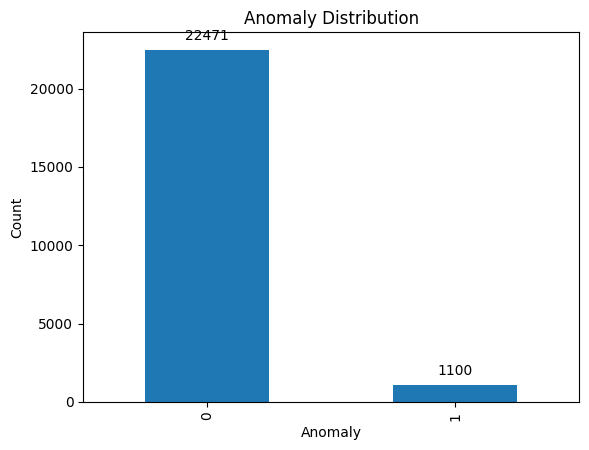

In [ ]:
# Count the occurrences of each anomaly value
anomaly_counts = df1['Anomaly'].value_counts()

# Create the bar chart
ax = anomaly_counts.plot(kind='bar')

# Add the count values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')


#df1['Anomaly'].value_counts().plot(kind='bar')
plt.title("Anomaly Distribution")
plt.xlabel("Anomaly")
plt.ylabel("Count")
plt.show()

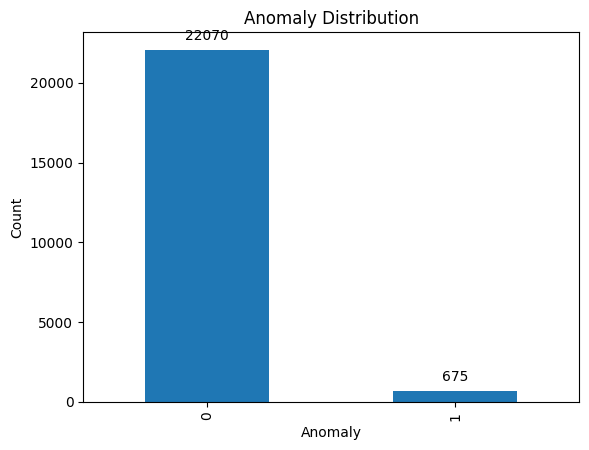

In [ ]:
#df2['Anomaly'].value_counts().plot(kind='bar')
# Count the occurrences of each anomaly value
anomaly_counts = df2['Anomaly'].value_counts()

# Create the bar chart
ax = anomaly_counts.plot(kind='bar')

# Add the count values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.title("Anomaly Distribution")
plt.xlabel("Anomaly")
plt.ylabel("Count")
plt.show()

We can observe from the two plots that there is the presence of class imbalance: Less number of anomaly=1 compared to anomaly=0

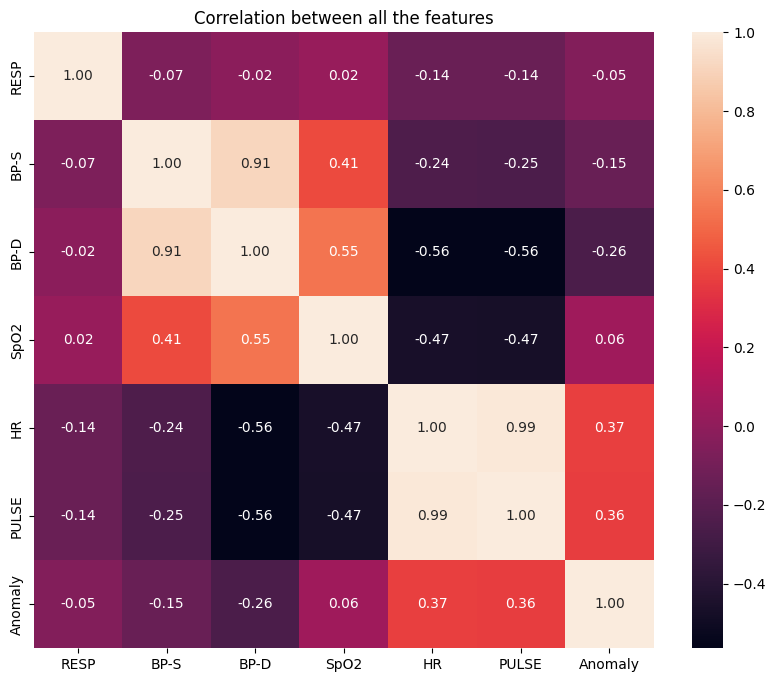

In [ ]:
plt.figure(figsize=(10,8))
cor=df1.corr()
sns.heatmap(cor,annot=True,fmt='.2f')
plt.title("Correlation between all the features")
plt.show()

We can see that there is a high correlation between BP-S and BP-D and also between HR and PULSE.

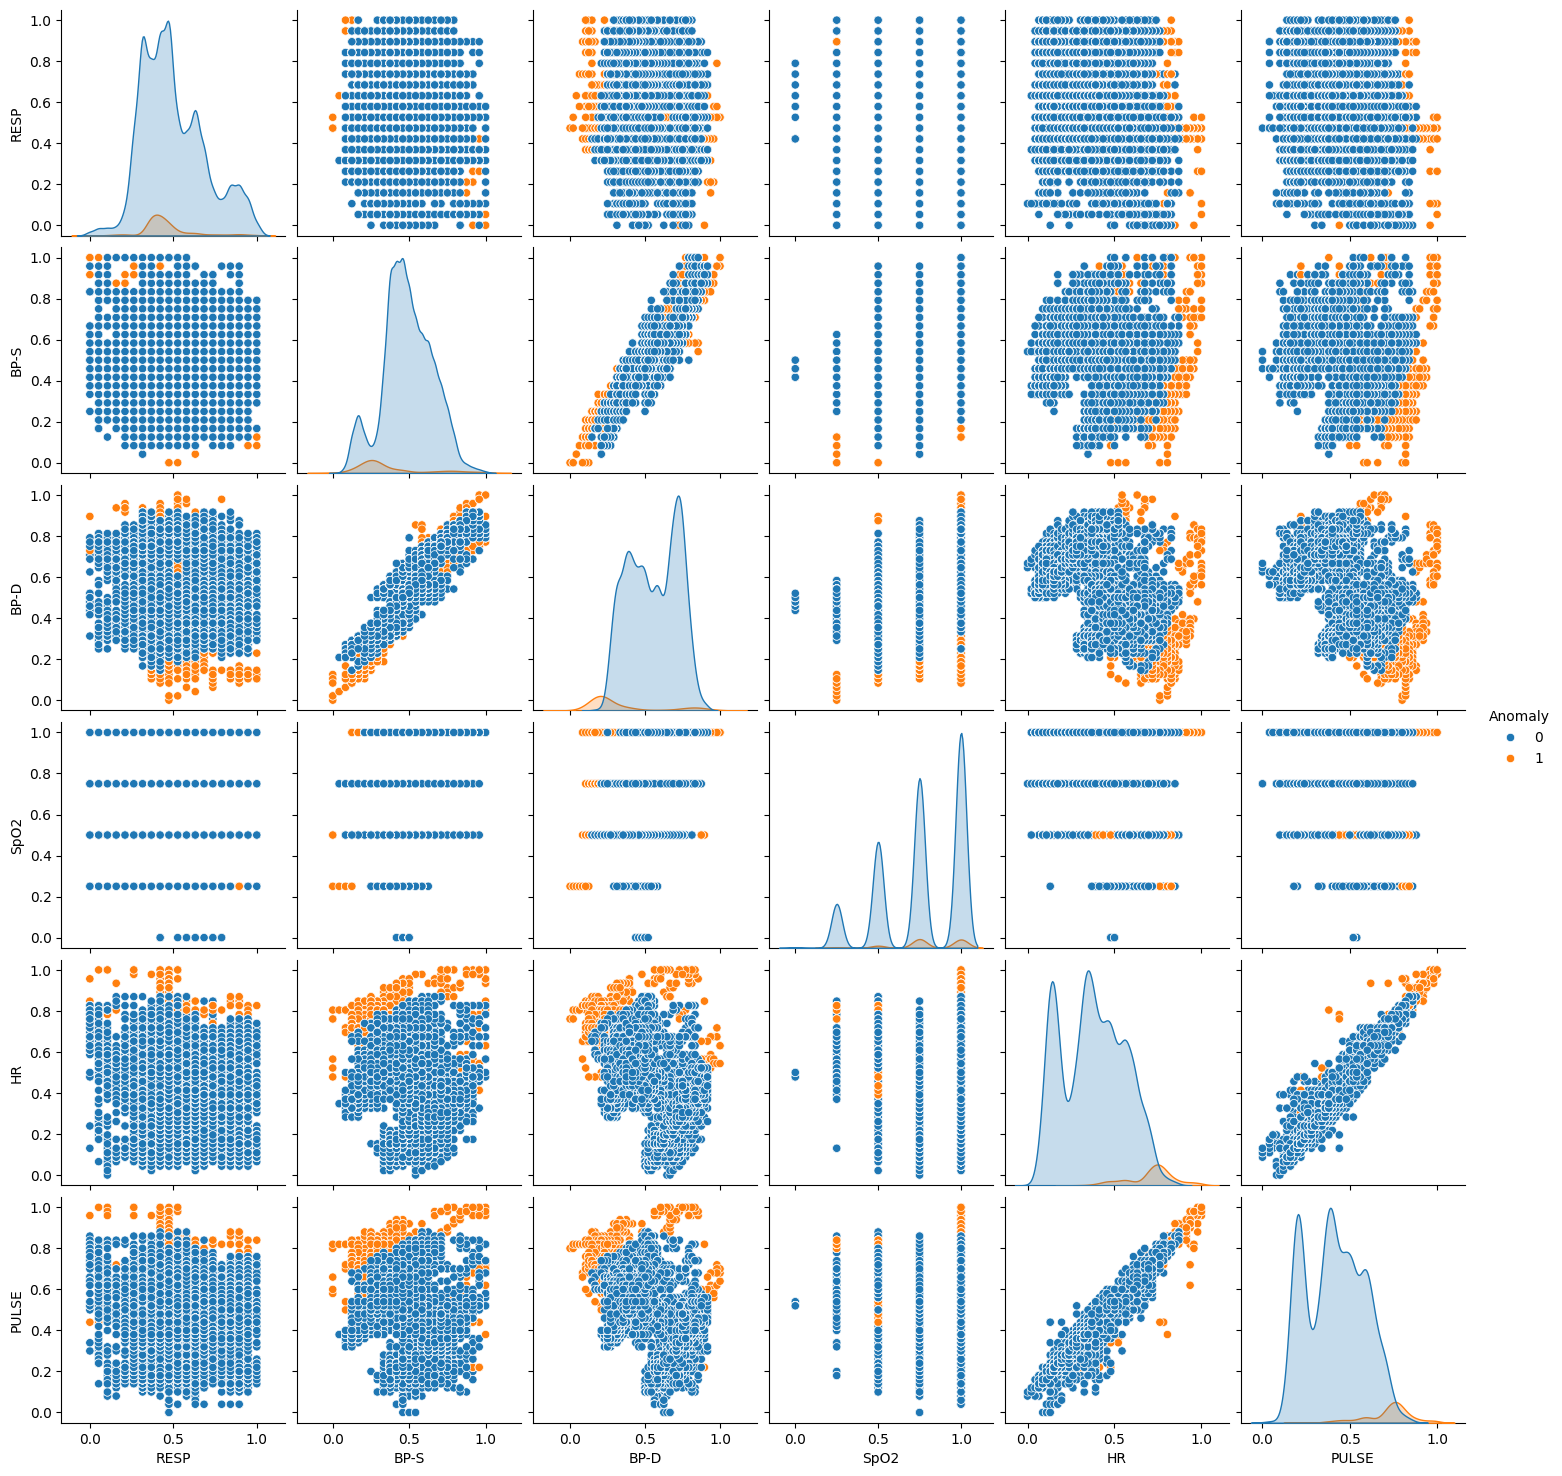

In [ ]:
sns.pairplot(df1, hue='Anomaly', vars=features)
plt.show()

Implement ID3 on patient-1 in two ways: One: Utilize Scikit-Learn's DecisionTreeClassifier: Train an ID3 model using this built-in implementation.

In [ ]:
from sklearn.model_selection import train_test_split
X=df1.drop('Anomaly',axis='columns')
y=df1['Anomaly']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=10,min_samples_split=10,min_samples_leaf=5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10)

We will be using **classification report, confusion matrix, accuracy score, Receiver operating curve(roc curve), auc(Area under the curve)** as the model evaluation metrics for the ID-3 model. However, in the data given to us, there is **class imbalance**. So, **accuracy score** is not a good evaluation metric in such cases where a situation of class imbalance is present.

In [ ]:
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc
report=classification_report(y_test,y_pred)
print(f"The classification report for this model is: \n\n")
print(report)

The classification report for this model is: 


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6733
           1       0.94      0.86      0.90       339

    accuracy                           0.99      7072
   macro avg       0.96      0.93      0.95      7072
weighted avg       0.99      0.99      0.99      7072



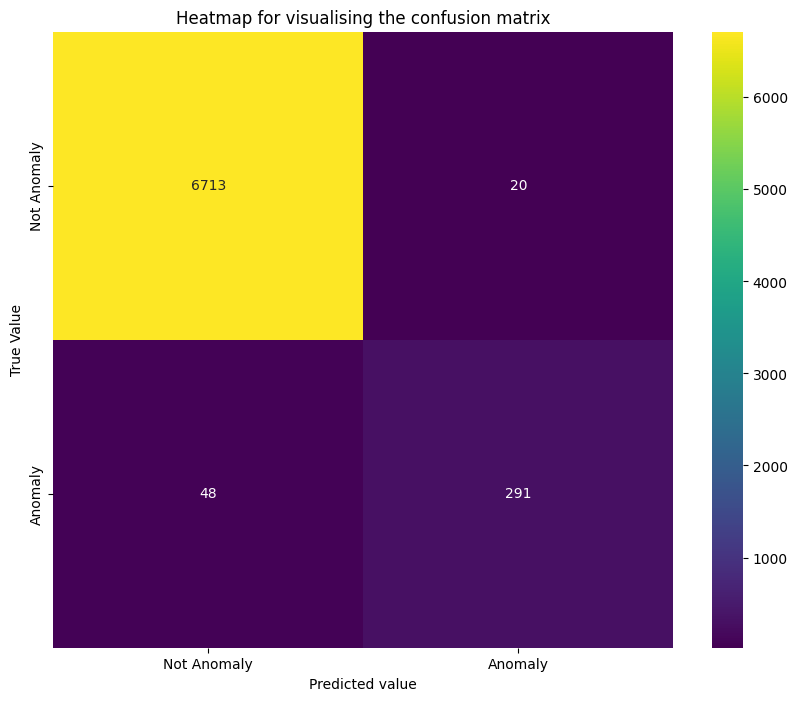

In [ ]:
#Heatmap for visualising the confusion matrix
plt.figure(figsize=(10,8))
cm=confusion_matrix(y_test,y_pred)
classes=['Not Anomaly','Anomaly']
sns.heatmap(cm,annot=True,xticklabels=classes,yticklabels=classes,fmt='d',cmap='viridis')
plt.xlabel("Predicted value")
plt.ylabel("True Value")
plt.title("Heatmap for visualising the confusion matrix")
plt.show()


We will using plot_tree to plot the decision tree

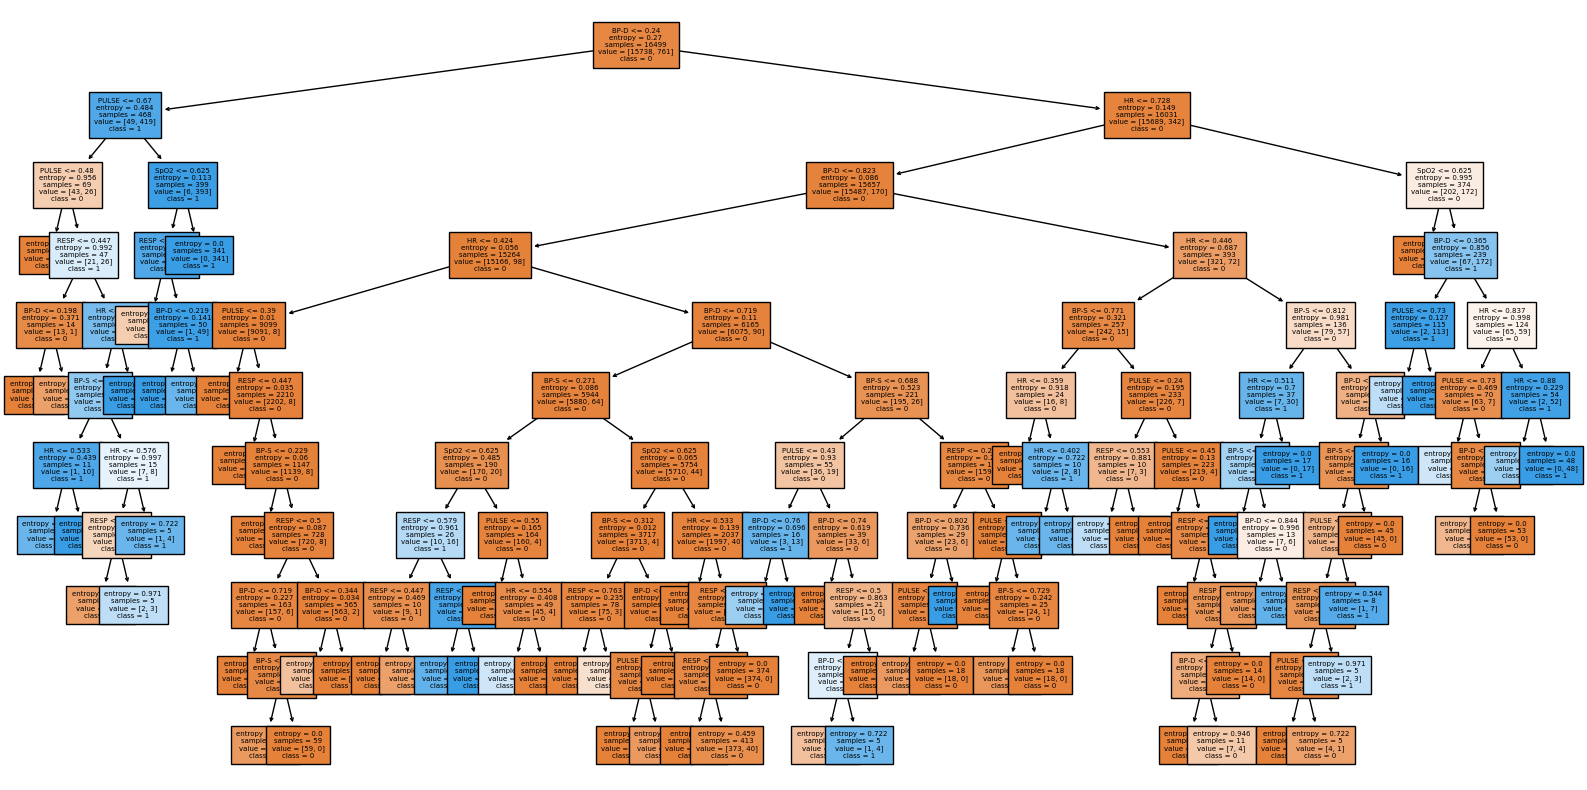

In [ ]:
#To print the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
feature_names = X.columns.tolist()
class_names = clf.classes_.astype(str).tolist()
plot_tree(clf,feature_names=feature_names,class_names=class_names,filled=True,fontsize=5)
plt.show()

In [ ]:
#Getting the AUC for this
probabilities=clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,probabilities)
roc=auc(fpr,tpr)
print(f"AUC is {roc}")

AUC is 0.9798706411033228


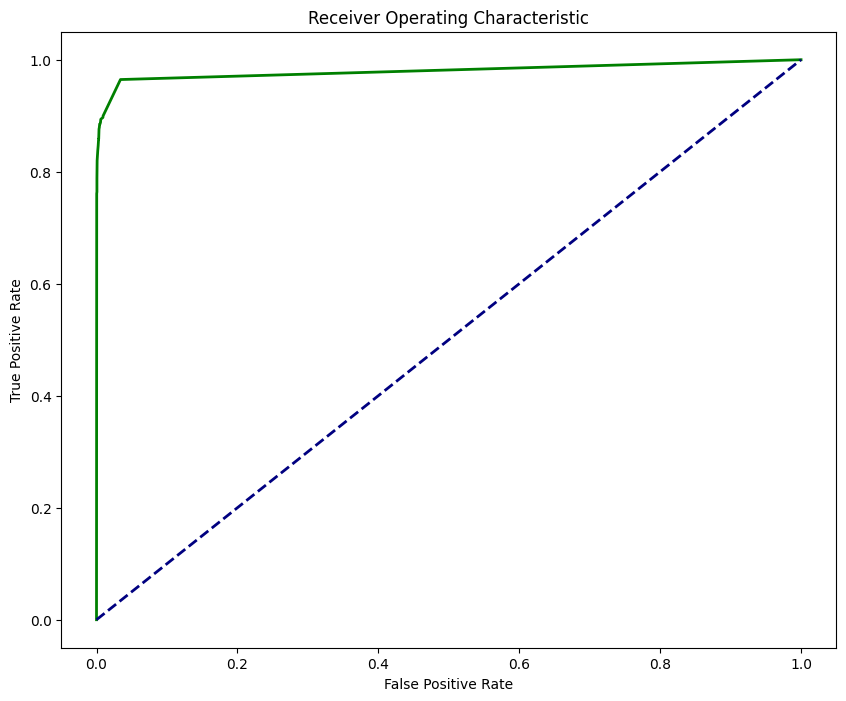

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='green', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

Now, we will be implementing the model from scratch
We will be creating two classes, one for the Node and one for the DecisionTreeClassifier.

In [ ]:
class Node():
  def __init__(self,feature=None,threshold=None,left=None,right=None,*,value=None):
    """Constructor for the Node class"""
    self.feature=feature
    self.threshold=threshold
    self.left=left
    self.right=right
    #We will only be using this value for the leaf node,otherwise, it remains None
    self.value=value

  def _is_leaf_node(self):
    return self.value is not None

In [ ]:
class DecisiontreeClassifier():
  def __init__(self,min_samples_split=2,max_depth=100,n_features=None):
    self.min_samples_split=min_samples_split
    self.max_depth=max_depth
    self.n_features=n_features
    self.root=None #We will use this to traverse the tree

  def fit(self,X,y):
    #Let's check the number of features in this
    self.n_features=X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
    self.root=self._grow_tree(X,y)


  def _grow_tree(self,X,y,curr_depth=0):
    n_samp,n_feat=X.shape
    n_labels=len(np.unique(y))

    #Checking the stopping condition
    if(curr_depth>=self.max_depth or n_labels==1 or n_samp<self.min_samples_split):
      leaf_value=self._set_leaf_value(y)
      return Node(value=leaf_value)

    feat_idx=np.random.choice(n_feat,self.n_features,replace=False)

    #find the best split
    best_threshold,best_feat=self.best_split(X,y,feat_idx)

    #Create the child nodes
    left_idxs,right_idxs=self.split(X[:,best_feat],best_threshold)
    #These are the indexes, we need to create the subtrees
    #We will do this recursively
    left=self._grow_tree(X[left_idxs,:],y[left_idxs],curr_depth+1)
    right=self._grow_tree(X[right_idxs,:],y[right_idxs],curr_depth+1)
    return Node(best_feat,best_threshold,left,right)


  def _set_leaf_value(self,y):
    if len(y) == 0:
        return None
    counter=Counter(y)
    value=counter.most_common(1)[0][0]
    return value

  def best_split(self,X,y,feat_idxs):
    #We will choose the feature that gives the highest info gain
    max_gain=-1
    split_idx,split_threshold=None,None
    for feat in feat_idxs:
      X_col=X[:,feat]
      thresholds=np.unique(X_col)
      for th in thresholds:
        #We will calculate the info gain
        #Update it if it is more than the max_gain
        ig=self._info_gain(y,X_col,th)
        if ig>max_gain:
          max_gain=ig
          split_idx=feat
          split_threshold=th

    return split_threshold,split_idx

  def _info_gain(self,y,X_col,th):
    #Calculate the parent entropy
    parent_ent=self.entropy(y)
    #create children
    left_idx,right_idx=self.split(X_col,th)
    if(len(left_idx)==0 or len(right_idx)==0):
      return 0
    #calculate weighted average entropy of child
    n=len(y)
    n_l,n_r=len(left_idx),len(right_idx)
    e_l,e_r=self.entropy(y[left_idx]),self.entropy(y[right_idx])
    child_ent=(n_l/n)*e_l + (n_r/n)*e_r

    info_gain=parent_ent-child_ent
    return info_gain


  def entropy(self,y):
    hist=np.bincount(y)
    p=hist/len(y) #Prob=no of samples satisfying the condition/total no of samples
    ent=-np.sum(i*np.log2(i) for i in p if i > 0)
    return ent

  def split(self,X_col,th):
    left_idxs=np.argwhere(X_col<=th).flatten()
    right_idxs=np.argwhere(X_col>th).flatten()
    return left_idxs,right_idxs

  def predict(self,X):
    return np.array([self._traverse_tree(self.root,x) for x in X])

  def _traverse_tree(self,node,x):
    if node._is_leaf_node():
      return node.value
    if x[node.feature]<=node.threshold:
      return self._traverse_tree(node.left,x)
    else:
      return self._traverse_tree(node.right,x)

<ipython-input-33-0be54f4138b6>:82: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ent=-np.sum(i*np.log2(i) for i in p if i > 0)


The classification report for this model is: 


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6733
           1       0.93      0.84      0.89       339

    accuracy                           0.99      7072
   macro avg       0.96      0.92      0.94      7072
weighted avg       0.99      0.99      0.99      7072



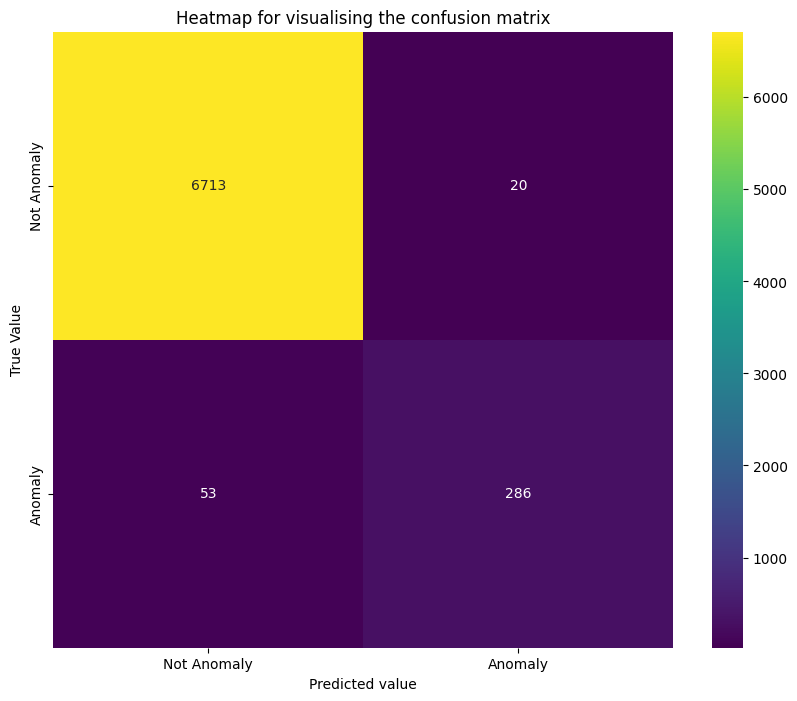

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df1.drop('Anomaly', axis='columns')
y = df1['Anomaly']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Convert the data to numpy arrays
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

# Create and train the decision tree classifier
clf = DecisiontreeClassifier(min_samples_split=10, max_depth=10)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred)
print(f"The classification report for this model is: \n\n")
print(report)

cm = confusion_matrix(y_test, y_pred)
classes = ['Not Anomaly', 'Anomaly']
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, fmt='d', cmap='viridis')
plt.xlabel("Predicted value")
plt.ylabel("True Value")
plt.title("Heatmap for visualising the confusion matrix")
plt.show()

We can observe that

* The accuracy is similar for both. But we are not considering accuracy since there is class imbalance.   
* There is minor improvement in the recall in the custom implementation and minor reduction in precision in the custom implementation as compared to the scikit learn implementation.
* The f1-score(given by the harmonic mean of precision and recall) is also similar between the two implementations.






**Implementing CART algorithm using Scikit learn on patient-2**

---

We will be using Scikit-Learn's DecisionTreeClassifier.CART uses Gini impurity as the criteria to split the nodes. So, we will be passing criterion='Gini' in the inbuilt implementation as the parameter.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_cart=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=10,min_samples_split=10,min_samples_leaf=5)
X2=df2.drop('Anomaly',axis='columns')
y2=df2['Anomaly']
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.30,random_state=42)
clf_cart.fit(X2_train,y2_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [ ]:
y_pred_cart=clf_cart.predict(X2_test)
report=classification_report(y2_test,y_pred_cart)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6639
           1       0.91      0.84      0.88       185

    accuracy                           0.99      6824
   macro avg       0.95      0.92      0.94      6824
weighted avg       0.99      0.99      0.99      6824



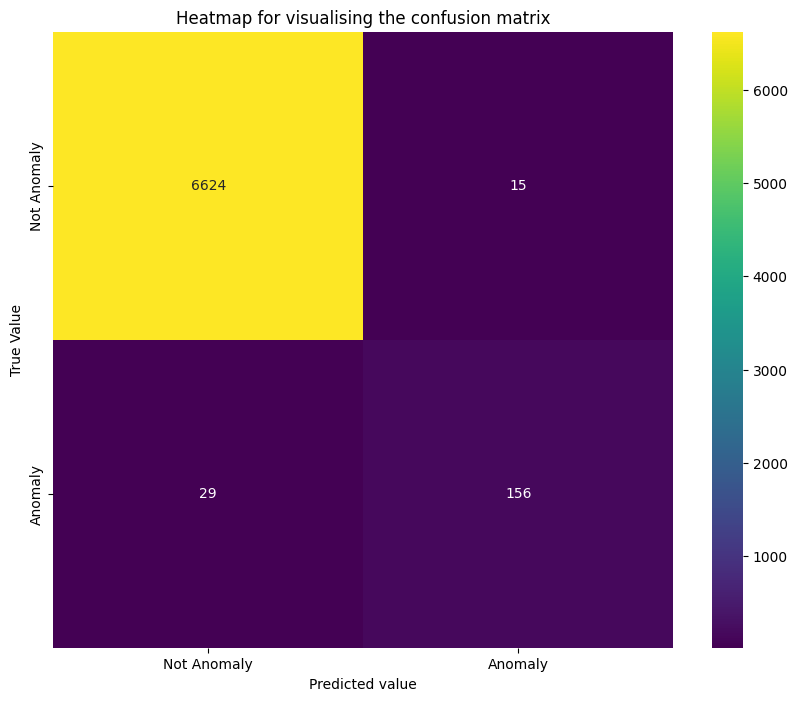

In [ ]:
plt.figure(figsize=(10,8))
cm2=confusion_matrix(y2_test,y_pred_cart)
classes=['Not Anomaly','Anomaly']
sns.heatmap(cm2,annot=True,xticklabels=classes,yticklabels=classes,fmt='d',cmap='viridis')
plt.xlabel("Predicted value")
plt.ylabel("True Value")
plt.title("Heatmap for visualising the confusion matrix")
plt.show()

**Implementing CART using Tensorflow's CartModel on patient-2**

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
train_data, test_data = train_test_split(df2, test_size=0.3, random_state=42)
train_data_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="Anomaly")
test_data_tf = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label="Anomaly")
model=tfdf.keras.CartModel()
model.fit(train_data_tf)


Use /tmp/tmpb9w5w49o as temporary training directory
Reading training dataset...
Training dataset read in 0:00:13.647254. Found 15921 examples.
Training model...
Model trained in 0:00:00.266912
Compiling model...
Model compiled.


In [ ]:
eval_data=model.evaluate(test_data_tf)
print(f"Evaluation results: {eval_data}")

7/7 [==============================] - 1s 13ms/step - loss: 0.0000e+00
Evaluation results: 0.0


In [ ]:
pred_data=model.predict(test_data_tf)
print(f"Predictions: \n\n")
print(pred_data)

7/7 [==============================] - 0s 13ms/step
Predictions: 


[[0.        ]
 [0.00852515]
 [0.        ]
 ...
 [0.        ]
 [0.03238866]
 [0.        ]]


In [ ]:
y_pred_tf = model.predict(test_data_tf).flatten()
y_pred_tf = [1 if x > 0.5 else 0 for x in y_pred_tf]  # Convert probabilities to binary labels

# Get the true labels from the test data
y_true = test_data['Anomaly'].values

# Calculate the classification report
report_tf = classification_report(y_true, y_pred_tf)
print("Classification Report:\n", report_tf)

# Calculate the accuracy
accuracy_tf = accuracy_score(y_true, y_pred_tf)
print("Accuracy:", accuracy_tf)


7/7 [==============================] - 0s 15ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6639
           1       0.87      0.81      0.84       185

    accuracy                           0.99      6824
   macro avg       0.93      0.90      0.92      6824
weighted avg       0.99      0.99      0.99      6824

Accuracy: 0.9915005861664713


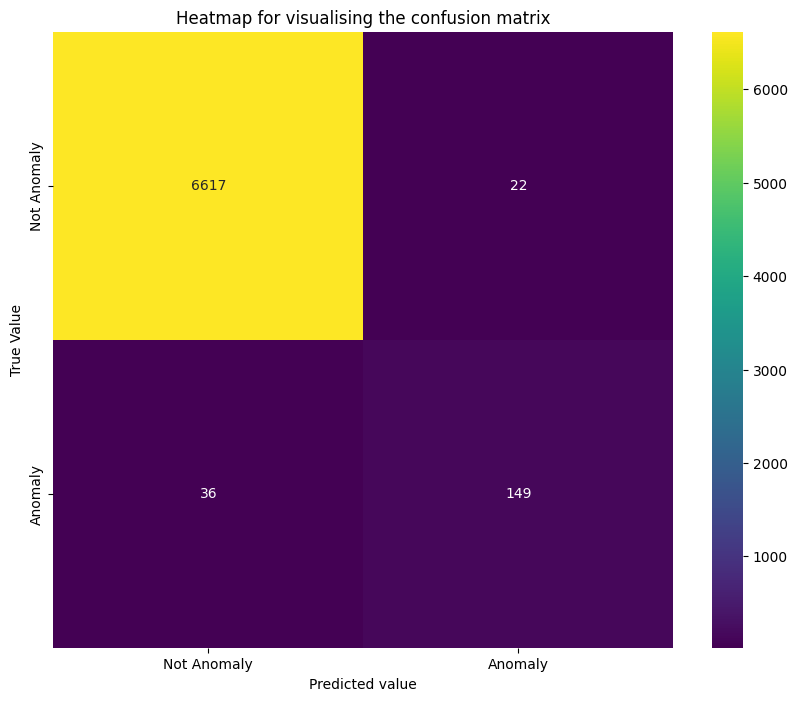

In [ ]:
plt.figure(figsize=(10,8))
cm_tf = confusion_matrix(y_true, y_pred_tf)
sns.heatmap(cm_tf,annot=True,xticklabels=classes,yticklabels=classes,fmt='d',cmap='viridis')
plt.xlabel("Predicted value")
plt.ylabel("True Value")
plt.title("Heatmap for visualising the confusion matrix")
plt.show()



*   TF-DF shows high overall accuracy and weighted averages, but slightly lower precision and recall for the minority class compared to scikit-learn.High overall accuracy and weighted averages suggest it performs well on the majority class and overall dataset.

*   Scikit-learn excels in precision and recall for the minority class, indicating better performance in handling imbalanced classes.Higher precision and recall for the minority class (Class 1) suggest better performance in identifying and minimizing false negatives and positive






**Comparison of ID-3 and CART**


---



*   Precision, Recall, and F1-Score: ID3 slightly outperforms CART in detecting true anomalies (class 1), though both perform similarly for the majority class (0).

* Class Imbalance Handling: ID3 handles the minority class better, achieving a slightly higher F1-score, which is crucial in imbalanced datasets.

* Decision Tree Applications: ID3 is better for anomaly detection, while CART offers simpler and faster models, ideal for tasks prioritizing interpretability and scalability.


**Train a Random Forest model using TensorFlow's Decision Forests library on the patient-1 training data. Evaluate the model's performance using the Patient-1 test data.**

In [ ]:
train_data_rd,test_data_rd=train_test_split(df1,test_size=0.30,random_state=42)
train_data_rd_tf=tfdf.keras.pd_dataframe_to_tf_dataset(train_data_rd,label='Anomaly')
test_data_rd_tf=tfdf.keras.pd_dataframe_to_tf_dataset(test_data_rd,label='Anomaly')

model_rd=tfdf.keras.RandomForestModel(verbose=2)
model_rd.fit(train_data_rd_tf)

Use 2 thread(s) for training
Use /tmp/tmpgh_8wh3y as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'RESP': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'BP-S': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'BP-D': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'SpO2': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'HR': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'PULSE': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>}
Label: Tensor("data_6:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'RESP': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'BP-S': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'BP-D': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'SpO2': SemanticTensor(semantic=<Semantic.NUMERIC

2024-09-15 14:07:06.182098: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1234] Loading model from path /tmp/tmpgh_8wh3y/model/ with prefix 59e06b1a36ce4eb5
I0000 00:00:1726409226.387485     186 decision_forest.cc:761] Model loaded with 300 root(s), 54208 node(s), and 6 input feature(s).
I0000 00:00:1726409226.401886     186 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-15 14:07:06.409077: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model trained in 0:00:08.914204
Compiling model...
Model compiled.


8/8 [==============================] - 0s 32ms/step - loss: 0.0000e+00
Evaluation results: 0.0
8/8 [==============================] - 0s 39ms/step
Predictions: 


[[0.11666662]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
8/8 [==============================] - 0s 45ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6733
           1       0.97      0.91      0.94       339

    accuracy                           0.99      7072
   macro avg       0.98      0.95      0.97      7072
weighted avg       0.99      0.99      0.99      7072

Accuracy: 0.994343891402715


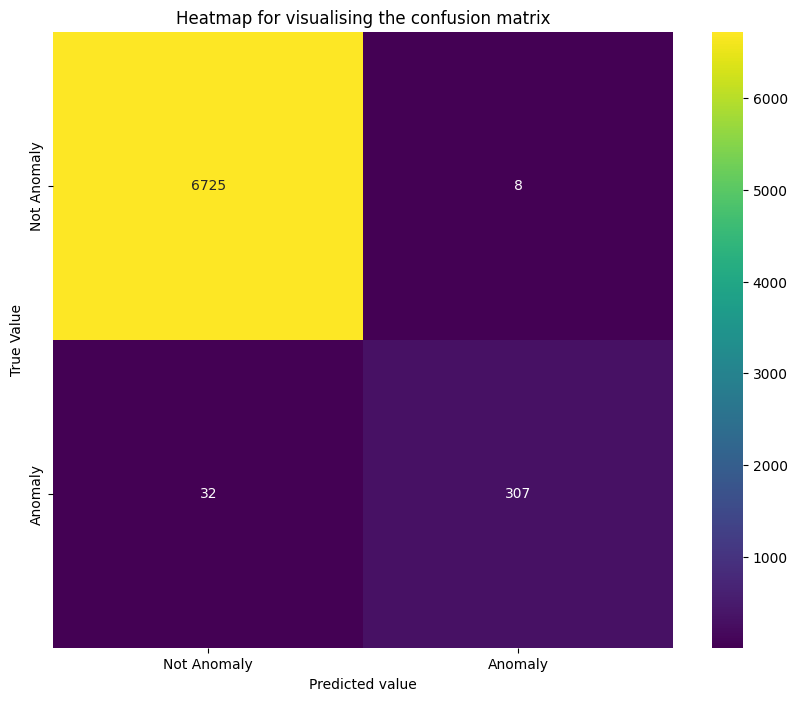

In [ ]:
eval_data_rd=model_rd.evaluate(test_data_rd_tf)
print(f"Evaluation results: {eval_data_rd}")
pred_data_rd=model_rd.predict(test_data_rd_tf)
print(f"Predictions: \n\n")
print(pred_data_rd)
y_pred_rd = model_rd.predict(test_data_rd_tf).flatten()
y_pred_rd = [1 if x > 0.5 else 0 for x in y_pred_rd]  # Convert probabilities to binary labels

# Get the true labels from the test data
y_true_rd = test_data_rd['Anomaly'].values

# Calculate the classification report
report_rd = classification_report(y_true_rd, y_pred_rd)
print("Classification Report:\n", report_rd)

# Calculate the accuracy
accuracy_rd = accuracy_score(y_true_rd, y_pred_rd)
print("Accuracy:", accuracy_rd)

plt.figure(figsize=(10,8))
cm_rd = confusion_matrix(y_true_rd, y_pred_rd)
sns.heatmap(cm_rd,annot=True,xticklabels=classes,yticklabels=classes,fmt='d',cmap='viridis')
plt.xlabel("Predicted value")
plt.ylabel("True Value")
plt.title("Heatmap for visualising the confusion matrix")
plt.show()


In [ ]:
eval_data_rd=model_rd.evaluate(test_data_rd_tf)
print(f"Evaluation results: {eval_data_rd}")

8/8 [==============================] - 1s 31ms/step - loss: 0.0000e+00
Evaluation results: 0.0


In [ ]:
pred_data_rd=model_rd.predict(test_data_rd_tf)
print(f"Predictions: \n\n")
print(pred_data_rd)

8/8 [==============================] - 0s 41ms/step
Predictions: 


[[0.11666662]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]


In [ ]:
y_pred_rd = model_rd.predict(test_data_rd_tf).flatten()
y_pred_rd = [1 if x > 0.5 else 0 for x in y_pred_rd]  # Convert probabilities to binary labels

# Get the true labels from the test data
y_true_rd = test_data_rd['Anomaly'].values

# Calculate the classification report
report_rd = classification_report(y_true_rd, y_pred_rd)
print("Classification Report:\n", report_rd)

# Calculate the accuracy
accuracy_rd = accuracy_score(y_true_rd, y_pred_rd)
print("Accuracy:", accuracy_rd)

8/8 [==============================] - 0s 26ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6733
           1       0.97      0.91      0.94       339

    accuracy                           0.99      7072
   macro avg       0.98      0.95      0.97      7072
weighted avg       0.99      0.99      0.99      7072

Accuracy: 0.994343891402715


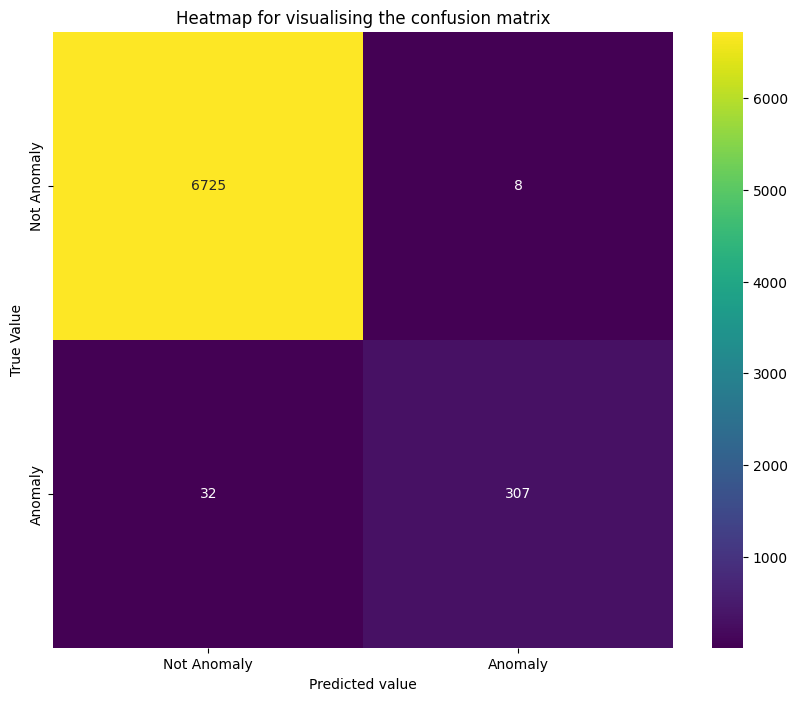

In [ ]:
plt.figure(figsize=(10,8))
cm_rd = confusion_matrix(y_true_rd, y_pred_rd)
sns.heatmap(cm_rd,annot=True,xticklabels=classes,yticklabels=classes,fmt='d',cmap='viridis')
plt.xlabel("Predicted value")
plt.ylabel("True Value")
plt.title("Heatmap for visualising the confusion matrix")
plt.show()

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model_rd, tree_idx=0, max_depth=3)

<Figure size 2000x1000 with 0 Axes>

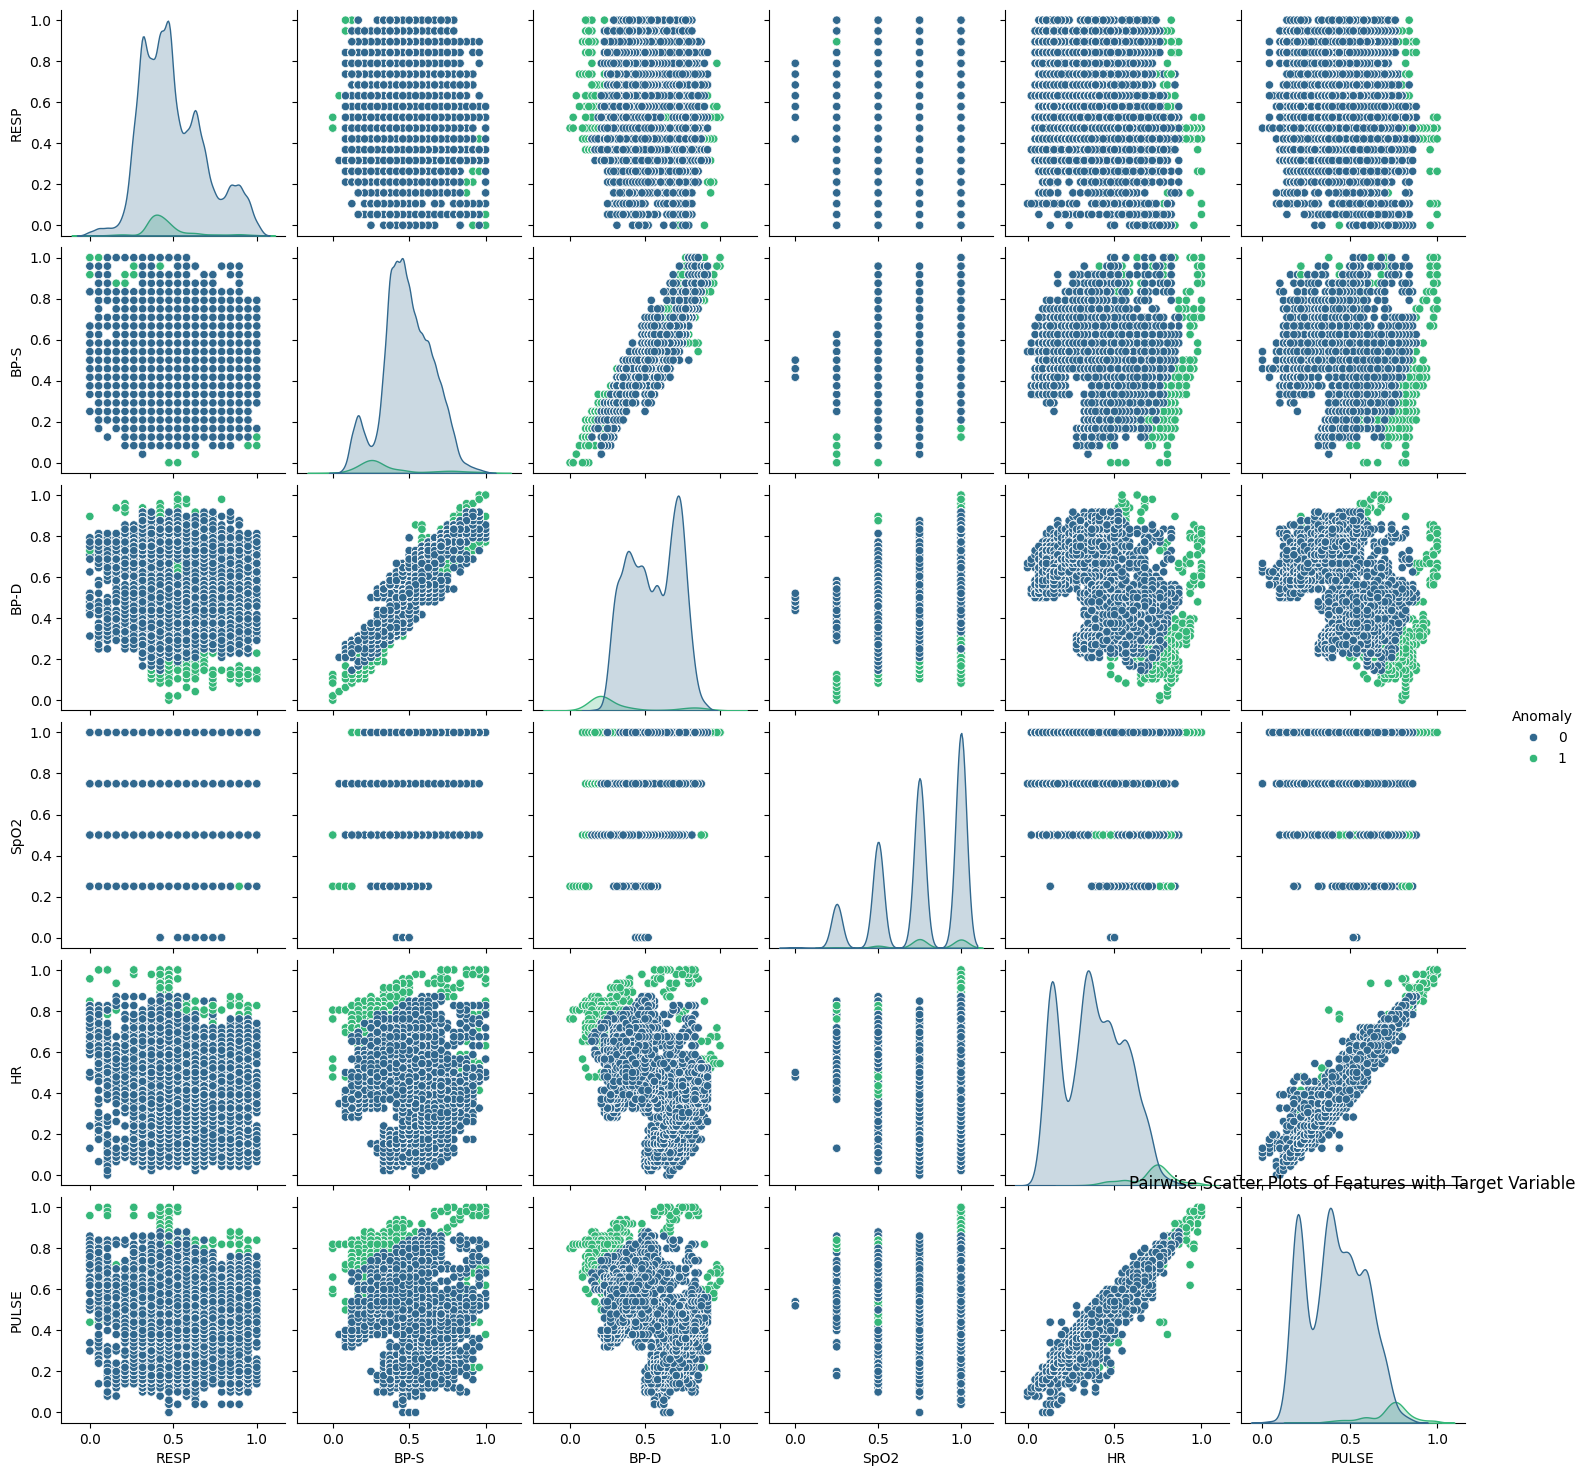

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(data=df1,hue='Anomaly',palette='viridis')
plt.title("Pairwise Scatter Plots of Features with Target Variable")
plt.show()

**Implement Gradient Boosted Decision Trees (GBDT) with various hyper-parameters on Patient-2 dataset. Compare the accuracy and log loss of these GBDT models to the Random Forest.**

**Using Scikit Learn**

In [ ]:
from sklearn.model_selection import train_test_split
train_data_gbdt, test_data_gbdt = train_test_split(df2, test_size=0.3, random_state=42)
train_data_tf_gbdt = tfdf.keras.pd_dataframe_to_tf_dataset(train_data_gbdt, label="Anomaly")
test_data_tf_gbdt = tfdf.keras.pd_dataframe_to_tf_dataset(test_data_gbdt, label="Anomaly")

# Create a Gradient Boosted Trees model
model_gbdt = tfdf.keras.GradientBoostedTreesModel()

# Train the model
model_gbdt.fit(train_data_tf_gbdt)

# Evaluate the model
eval_data = model_gbdt.evaluate(test_data_tf_gbdt)
print(f"Evaluation results: {eval_data}")

# Make predictions
pred_data = model_gbdt.predict(test_data_tf_gbdt)
print(f"Predictions: \n\n")
print(pred_data)


Use /tmp/tmpo9hqe7a2 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.487802. Found 15921 examples.
Training model...
Model trained in 0:00:02.616263
Compiling model...
Model compiled.
7/7 [==============================] - 0s 10ms/step - loss: 0.0000e+00
Evaluation results: 0.0
7/7 [==============================] - 0s 8ms/step
Predictions: 


[[3.3326320e-05]
 [1.5381344e-04]
 [4.7934311e-05]
 ...
 [4.5761185e-06]
 [8.7201851e-04]
 [2.7286860e-05]]


In [ ]:
# Get the predicted probabilities
y_pred_prob = model_gbdt.predict(test_data_tf_gbdt)

# Convert probabilities to binary labels
y_pred = [1 if x > 0.5 else 0 for x in y_pred_prob.flatten()]

# Get the true labels from the test data
y_true = test_data_gbdt['Anomaly'].values

# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Calculate the log loss
from sklearn.metrics import log_loss
logloss = log_loss(y_true, y_pred_prob)
print("Log Loss:", logloss)


7/7 [==============================] - 0s 8ms/step
Accuracy: 0.9969226260257913
Log Loss: 0.00862509912084546


**Creating Random Forest for patient-2**

Use 2 thread(s) for training
Use /tmp/tmpv3nmz2g3 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'RESP': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'BP-S': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'BP-D': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'SpO2': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'HR': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'PULSE': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>}
Label: Tensor("data_6:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'RESP': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'BP-S': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'BP-D': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'SpO2': SemanticTensor(semantic=<Semantic.NUMERIC

Training dataset read in 0:00:00.496641. Found 15921 examples.
Training model...


2024-09-15 14:11:24.480866: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1234] Loading model from path /tmp/tmpv3nmz2g3/model/ with prefix 731bad9efb0f455b
I0000 00:00:1726409484.705017     186 decision_forest.cc:761] Model loaded with 300 root(s), 55706 node(s), and 6 input feature(s).
I0000 00:00:1726409484.710794     186 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-15 14:11:24.715636: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model trained in 0:00:07.173235
Compiling model...
Model compiled.


7/7 [==============================] - 1s 55ms/step - loss: 0.0000e+00
Evaluation results: 0.0
7/7 [==============================] - 0s 24ms/step
Predictions: 


[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
7/7 [==============================] - 0s 31ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6639
           1       0.93      0.90      0.92       185

    accuracy                           1.00      6824
   macro avg       0.96      0.95      0.96      6824
weighted avg       1.00      1.00      1.00      6824

Accuracy: 0.9954572098475967


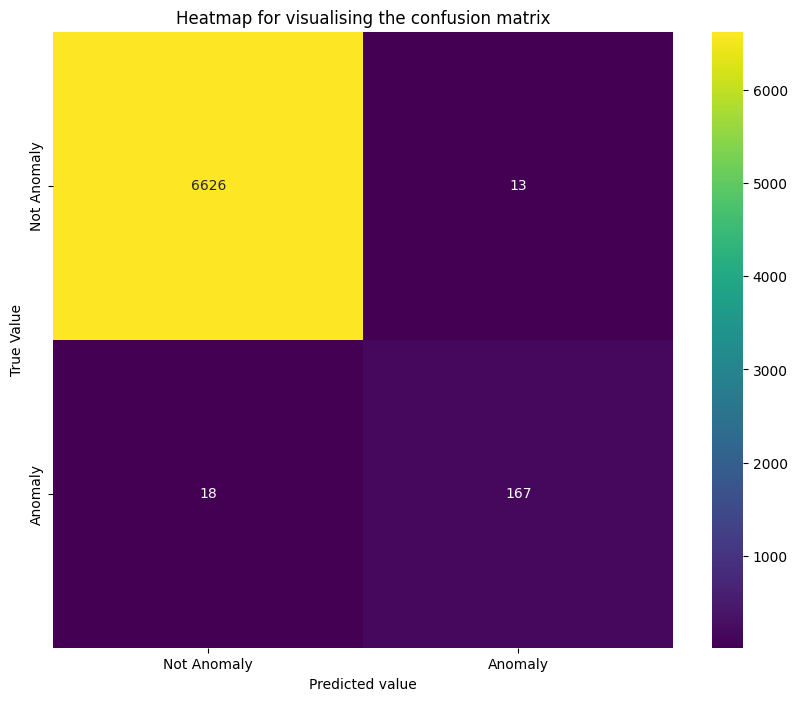

In [ ]:

# Split the data into training and testing sets
train_data_rd, test_data_rd = train_test_split(df2, test_size=0.30, random_state=42)

# Convert the data to TensorFlow Datasets
train_data_rd_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train_data_rd, label='Anomaly')
test_data_rd_tf = tfdf.keras.pd_dataframe_to_tf_dataset(test_data_rd, label='Anomaly')

# Create a Random Forest model
model_rd = tfdf.keras.RandomForestModel(verbose=2,compute_oob_performances=True)

# Train the model
model_rd.fit(train_data_rd_tf)

# Evaluate the model
eval_data_rd = model_rd.evaluate(test_data_rd_tf)
print(f"Evaluation results: {eval_data_rd}")

# Make predictions
pred_data_rd = model_rd.predict(test_data_rd_tf)
print(f"Predictions: \n\n")
print(pred_data_rd)

# Convert probabilities to binary labels
y_pred_rd = model_rd.predict(test_data_rd_tf).flatten()
y_pred_rd = [1 if x > 0.5 else 0 for x in y_pred_rd]

# Get the true labels from the test data
y_true_rd = test_data_rd['Anomaly'].values

# Calculate the classification report
report_rd = classification_report(y_true_rd, y_pred_rd)
print("Classification Report:\n", report_rd)

# Calculate the accuracy
accuracy_rd = accuracy_score(y_true_rd, y_pred_rd)
print("Accuracy:", accuracy_rd)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
cm_rd = confusion_matrix(y_true_rd, y_pred_rd)
sns.heatmap(cm_rd, annot=True, xticklabels=classes, yticklabels=classes, fmt='d', cmap='viridis')
plt.xlabel("Predicted value")
plt.ylabel("True Value")
plt.title("Heatmap for visualising the confusion matrix")
plt.show()



In [ ]:
# Plot a tree from the model
tfdf.model_plotter.plot_model_in_colab(model_rd, tree_idx=0, max_depth=3)

In [ ]:
#Get Feature importances for GDBT model

inspector = model_gbdt.make_inspector()
feature_imp=inspector.variable_importances()
print(feature_imp)


{'NUM_NODES': [("BP-D" (1; #0), 1144.0), ("RESP" (1; #4), 971.0), ("BP-S" (1; #1), 847.0), ("PULSE" (1; #3), 834.0), ("HR" (1; #2), 813.0), ("SpO2" (1; #5), 810.0)], 'NUM_AS_ROOT': [("SpO2" (1; #5), 102.0), ("RESP" (1; #4), 40.0), ("BP-D" (1; #0), 38.0), ("BP-S" (1; #1), 10.0), ("PULSE" (1; #3), 8.0), ("HR" (1; #2), 1.0)], 'INV_MEAN_MIN_DEPTH': [("SpO2" (1; #5), 0.3616417950561784), ("RESP" (1; #4), 0.2947915820550124), ("BP-D" (1; #0), 0.26826964152041505), ("BP-S" (1; #1), 0.23380519782769293), ("HR" (1; #2), 0.22899008837763513), ("PULSE" (1; #3), 0.2284080252748713)], 'SUM_SCORE': [("HR" (1; #2), 281.01081173992947), ("BP-D" (1; #0), 242.81646265463215), ("SpO2" (1; #5), 206.72951331328966), ("BP-S" (1; #1), 203.15200283661977), ("PULSE" (1; #3), 175.0060208620886), ("RESP" (1; #4), 116.44194884455945)]}


In [ ]:
#Get Feature importances for Random Forest model

inspector = model_rd.make_inspector()
feature_imp=inspector.variable_importances()
print(feature_imp)

{'INV_MEAN_MIN_DEPTH': [("SpO2" (1; #5), 0.6147425842121794), ("RESP" (1; #4), 0.26132146008518237), ("HR" (1; #2), 0.24443281216593618), ("BP-D" (1; #0), 0.18220199259159922), ("BP-S" (1; #1), 0.17607521995365122), ("PULSE" (1; #3), 0.16091888502617127)], 'SUM_SCORE': [("SpO2" (1; #5), 158030.00781531722), ("HR" (1; #2), 113517.70483046155), ("RESP" (1; #4), 97479.4648340051), ("BP-D" (1; #0), 94766.27680265586), ("BP-S" (1; #1), 85622.89899622435), ("PULSE" (1; #3), 75280.01710877568)], 'NUM_AS_ROOT': [("SpO2" (1; #5), 188.0), ("HR" (1; #2), 67.0), ("PULSE" (1; #3), 45.0)], 'NUM_NODES': [("BP-D" (1; #0), 6130.0), ("RESP" (1; #4), 5847.0), ("BP-S" (1; #1), 4945.0), ("PULSE" (1; #3), 4078.0), ("HR" (1; #2), 3990.0), ("SpO2" (1; #5), 2713.0)]}


In [ ]:
#Plotting the graphs for accuracy and log loss
oob_metrics=model_rd.make_inspector().evaluation()
print(f"Accuracy: {oob_metrics.accuracy}")
print(f"Log loss: {oob_metrics.loss}")


Accuracy: 0.9959173418755103
Log loss: 0.021855446240435856


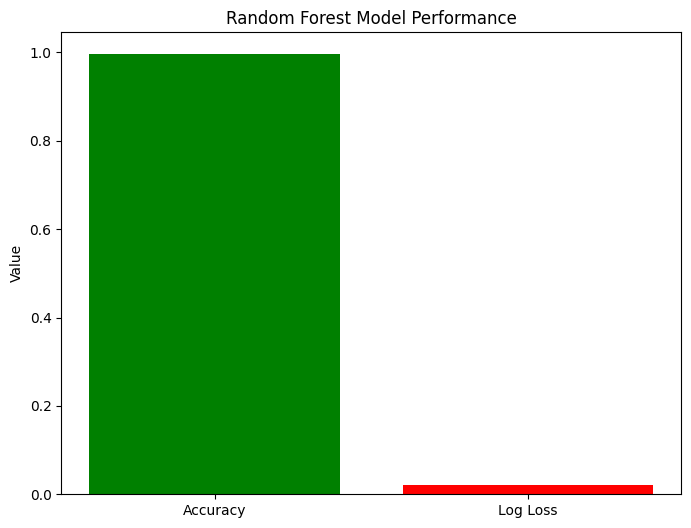

In [ ]:
# prompt: Plot the above accuracy and log loss

import matplotlib.pyplot as plt

# Assuming 'oob_metrics' is defined as in the preceding code.
accuracy = oob_metrics.accuracy
log_loss = oob_metrics.loss

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Accuracy', 'Log Loss'], [accuracy, log_loss], color=['green', 'red'])
plt.title('Random Forest Model Performance')
plt.ylabel('Value')
plt.show()


In [ ]:
tr_data, ts_data = train_test_split(df2, test_size=0.30, random_state=42)

# Convert the data to TensorFlow Datasets
tr_data_rd = tfdf.keras.pd_dataframe_to_tf_dataset(tr_data, label='Anomaly')
ts_data_rd = tfdf.keras.pd_dataframe_to_tf_dataset(ts_data, label='Anomaly')



n_trees_list = []
oob_accuracy_list = []
oob_log_loss_list = []

# Loop over different numbers of trees
for n_trees in range(5, 35, 5):
    print(f"Training Random Forest with {n_trees} trees...")
    model_rd_tf = tfdf.keras.RandomForestModel(num_trees=n_trees, compute_oob_performances=True)

    # Train the model
    model_rd_tf.fit(tr_data_rd)

    # Get the model inspector to access OOB evaluations
    inspector = model_rd_tf.make_inspector()

    # Access OOB evaluation metrics
    oob_metrics = inspector.evaluation()

    # Store the number of trees, OOB accuracy, and log loss
    n_trees_list.append(n_trees)
    oob_accuracy_list.append(oob_metrics.accuracy)
    oob_log_loss_list.append(oob_metrics.loss)



Training Random Forest with 5 trees...
Use /tmp/tmp27nfct38 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.478992. Found 15921 examples.
Training model...
Model trained in 0:00:00.134372
Compiling model...
Model compiled.
Training Random Forest with 10 trees...
Use /tmp/tmpfw86_cmq as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.587360. Found 15921 examples.
Training model...
Model trained in 0:00:00.324121
Compiling model...
Model compiled.
Training Random Forest with 15 trees...
Use /tmp/tmpk53qabzb as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.466269. Found 15921 examples.
Training model...
Model trained in 0:00:00.345851
Compiling model...
Model compiled.
Training Random Forest with 20 trees...
Use /tmp/tmpvgwyy8va as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.388556. Found 15921 examples.
Training m

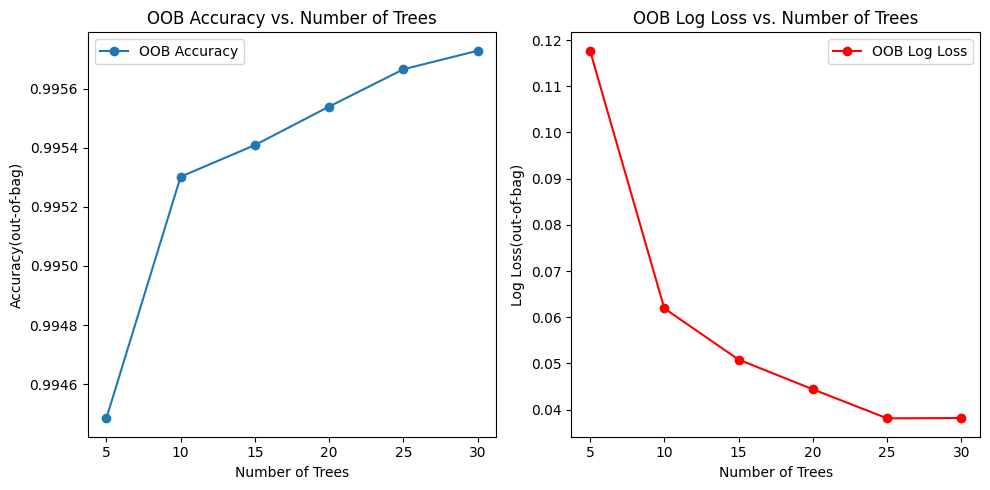

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(n_trees_list, oob_accuracy_list, label='OOB Accuracy', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy(out-of-bag)')
plt.title('OOB Accuracy vs. Number of Trees')
plt.legend()

# Plot OOB Log Loss
plt.subplot(1, 2, 2)
plt.plot(n_trees_list, oob_log_loss_list, label='OOB Log Loss', marker='o', color='red')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss(out-of-bag)')
plt.title('OOB Log Loss vs. Number of Trees')
plt.legend()

plt.tight_layout()
plt.show()